In [16]:
import matplotlib.pyplot as plt
import numpy as np
import docs.source.filters as filters

Reading file

In [17]:
file_path = 'docs/4_4_5M_TF.txt'

frequencies = []
dB_values = []

with open(file_path, 'r') as file:
    for line in file:
        # Skip comment lines
        if line.startswith(';'):
            continue
        # Split the line by comma and convert to float
        try:
            freq, dB = map(float, line.split(','))
            frequencies.append(freq)
            dB_values.append(dB)
        except ValueError:
            # In case of a malformed line, print a message and skip
            print(f"Skipping malformed line: {line.strip()}")
            
# Convert lists to numpy arrays
frequencies = np.array(frequencies, dtype=float)
dB_values = np.array(dB_values, dtype=float)


Generating Filter Model

In [18]:
# #Variables
Ch = 20e-12
Cr = 75e-15
fs = 9.6e9

H_44, omega, Zo, fc = filters.DFTF('BPF44', Ch, Cr, fs)

# Convert normalized frequencies (omega) to Hz
frequencies_1 = omega * fs / (2 * np.pi)

# Define the frequency range for plotting 
freq_range_min = -50e6
freq_range_max = 50e6  

# Apply the frequency range filter
mask_1 = (frequencies_1 >= freq_range_min) & (frequencies_1 <= freq_range_max)

4/4 BPF Ch = 2e-11 Cr = 7.5e-14 Fs = 9600000000.0
Zo =  1388.888888888889
Fc =  5.729551094138192  MHz
arctan(Cr / Ch) =  0.0037499824220233137
fs / (2 * np.pi) =  1527887453.6821952


Comparing

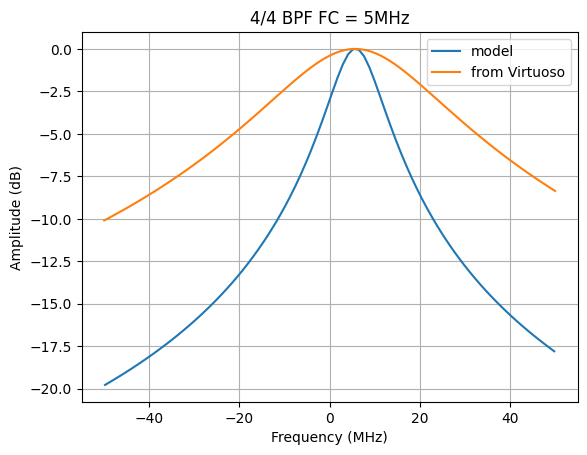

In [26]:
# Plot magnitude response
plt.figure(1)
plt.plot(frequencies_1[mask_1]/1e6, 20 * np.log10(np.abs(H_44[mask_1])), label='model')

plt.plot(frequencies/1e6, dB_values - max(dB_values), label='from Virtuoso')
plt.title('4/4 BPF FC = 5MHz')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.legend()
plt.show()